1. Write a function which gives the trajectory of a Brownian motion $(B_s)_{0≤s≤T}$
between 0 and T on some grid containing N equal segments. The input variables
of the function should be T and N. The output should be the values of the
Brownian motion on the grid. There should be no loop in this function.


Text(0.5, 0, 'time')

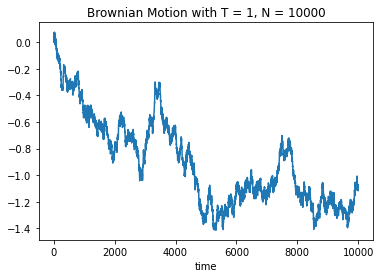

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import scipy.stats as stats
from scipy.stats import expon, geom, norm

def BrownianGenerate(T, N):
  dt = T/N
  X = np.zeros(N)
  X[1:N+1] = np.sqrt(dt) * npr.normal(size=N-1)
  B = np.cumsum(X)
  return B

def qqplotSample(data1, data2): 
    #Calculate quantiles
    if (len(data1)>len(data2)): 
        test1=data1
        test2=data2
    else: 
        test2=data1
        test1=data2
        
    test1.sort()
    quantile_levels1 = np.arange(len(test1),dtype=float)/len(test1)

    test2.sort()
    quantile_levels2 = np.arange(len(test2),dtype=float)/len(test2)

    quantile_levels = quantile_levels2

    quantiles2 = test2

    quantiles1 = np.interp(quantile_levels,quantile_levels1,test1)

    if (len(data1)>len(data2)): 
        plt.plot(quantiles1,quantiles2,'bo')
    else: 
        plt.plot(quantiles2,quantiles1,'bo')
    plt.xlabel("Quantiles of the first sample")
    plt.ylabel("Quantiles of the second sample")
    
    maxval = max(test1[-1],test2[-1])
    minval = min(test1[0],test2[0])
    plt.plot([minval,maxval],[minval,maxval],color='red')

    plt.show()
    
# Plot Brownian Motion
plt.plot(BrownianGenerate(1, 10000))
plt.title('Brownian Motion with T = 1, N = 10000')
plt.xlabel('time')

From now on, we set $T = 1$ . Check that the maximum of the Brownian motion
a grid on $[0, T]$ has approximately the same distribution as $|B_T |$ (we can use
qqplotSample which is given in the padlet).


In [40]:
T, N = 1, 10000

# Generate Max_Ws (O(n^2))
Max_Ws = np.zeros(N)
for i in range(0, N):
  Max_Ws[i] = np.max(BrownianGenerate(T,1000))

In [43]:
Max_Ws

array([0.        , 0.        , 0.        , ..., 3.7100356 , 3.72907383,
       3.78266882])

In [41]:
# Generate |B_T| (O(n))
def AbsBrownianGenerate(T, N):
  B = np.abs(npr.normal(size=N, scale=np.sqrt(T)))
  return B

Abs_WT = AbsBrownianGenerate(T, N)

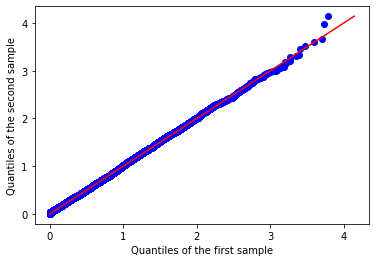

In [42]:
# QQ Plot of 2 samples
qqplotSample(Max_Ws, Abs_WT)

From the QQ Plot, we can see that most data points have the same quantile, except some outliers at the top of the graph. From this, we can conclude that $max_{0 \leq s \leq T} W_s$ and $|W_T|$ have the same distribution.

Write in the jupyter notebook, the calculations that gives the theoretical value of
$E[max_{0≤s≤T} B_s]$. (In latex, equations are between dollars, integrals are written
with \int and fraction using \frac).

Because $$max_{0 \leq s \leq T} W_s \stackrel{L}{=} |W_T|$$
So $\mathbb{E}(max_{0 \leq s \leq T} W_s) = \mathbb{E}(|W_T|) = \int_{-\infty}^{\infty}\frac{1}{\sqrt{2\pi}}|x|e^{-\frac{x^2}{2}}dx$
$$\int_{-\infty}^{\infty}\frac{1}{\sqrt{2\pi}}|x|e^{-\frac{x^2}{2}}dx = 2\int_{0}^{\infty}\frac{1}{\sqrt{2\pi}}xe^{-\frac{x^2}{2}}dx=2\int_{0}^{\infty}\frac{-1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}d(\frac{-x^2}{2})=\sqrt{\frac{2}{\pi}}\left( -e^{\frac{-x^2}{2}}\left.\right|_0^{\infty}\right)=\sqrt{\dfrac{2}{\pi}}(-0+1)=\sqrt{\dfrac{2}{\pi}}$$

4. Illustrate the Law of Large Numbers
We will compute empirical mean from sample $|W_T|$ and compare it with the mean from Exercise 3.

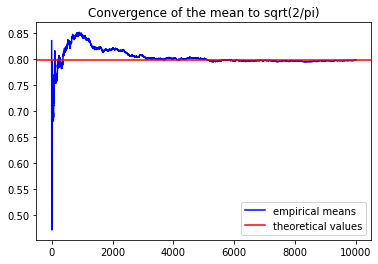

In [45]:
y=np.cumsum(np.absolute(npr.normal(size=N)))/np.arange(1,N+1)
true_mean = np.sqrt(2/np.pi)
plt.plot(y,color='blue')
plt.axhline(y=true_mean,color='red')
plt.title("Convergence of the mean to sqrt(2/pi)")
labels=["empirical means","theoretical values"]
plt.legend(labels)
plt.show()
plt.close()

Plot an histogram of an approximation of $max_{0≤s≤T} B_s$ on the grid (see question
1) and compare with the theoretical density of $|B_T |$.
$$\int_{\mathbb{R}}h(|x|)e^{\frac{-x^2}{2}}\frac{1}{\sqrt{2\pi}}dx=2\int_{0}^{\infty}h(x)e^{\frac{-x^2}{2}}\frac{1}={\sqrt{2\pi}}dx=\int_{-\infty}^{\infty}h(x)\sqrt{\frac{2}{\pi}}e^{\frac{-x^2}{2}}\mathbb{1}_{x>0}dx$$
So the density of $|W_T|$ is
$$f(x)=\sqrt{\frac{2}{\pi}}e^{\frac{-x^2}{2}}\mathbb{1}_{x>0}$$

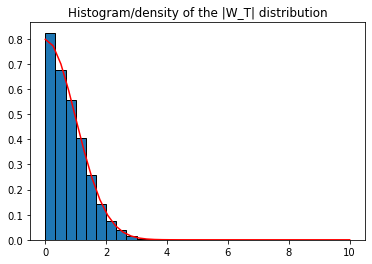

In [46]:
def densite(x):
  return np.sqrt(2/np.pi)*np.exp(-x**2/2)

plt.hist(Max_Ws, range = (0,10), bins = 30, density=True,edgecolor = 'black')
x = np.linspace(0,10, 40)
plt.plot(x,densite(x),color='red')
plt.title("Histogram/density of the |W_T| distribution")
plt.show()
plt.close()